<a href="https://colab.research.google.com/github/pankaj-beldar/patent-data-NLP-classification/blob/main/countvector_tfidf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# here we will import the libraries used for machine learning
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from scipy.stats import randint
import pandas as pd # data processing, CSV file I/O, data manipulation
import matplotlib.pyplot as plt # this is used for the plot the graph
import seaborn as sns # used for plot interactive graph.
from pandas import set_option
plt.style.use('ggplot') # nice plots
from matplotlib.pyplot import figure
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.figure_factory as ff
from sklearn import preprocessing
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples
import scipy.cluster.hierarchy as sch
import warnings
warnings.filterwarnings('ignore')
#for nlp
from sklearn import preprocessing
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split, KFold
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
import missingno as msno
import matplotlib.cm as cm
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
# Importing libraries for clustering
import matplotlib.cm as cm
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import AffinityPropagation
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.preprocessing import OneHotEncoder

In [2]:


# Mounting google drive
from google.colab import drive
drive.mount('/content/drive')

df = pd.read_excel('/content/drive/MyDrive/Patent_paper/data.xlsx')

Mounted at /content/drive


In [3]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
import string
string.punctuation

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [4]:
#create a function to trasform text
def transform_text(text):
    # covert to lower case
    text = text.lower()
    # tokenize text
    text = nltk.word_tokenize(text)
    # remove special characters
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)

    text = y[:]
    y.clear()
    # remove stopwords
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    text = y[:]
    y.clear()
    # stemming text
    for i in text:
        y.append(ps.stem(i))


    return " ".join(y)



In [5]:
df.head()

,PUBLICATION_NUMBER,PUBLICATION_DATE,IPO_LOCATION,APPLICATION_TYPE_DESC,APPLICATION_NUMBER,DATE_OF_FILING,TITLE_OF_INVENTION,FIELD_OF_INVENTION,NO_OF_PAGES,NO_OF_CLAIMS,DATE_UPDATED_d_m_y
0,2023-01-01 00:00:00,2023-01-06,Mumbai,PCT NATIONAL PHASE APPLICATION,10/MUMNP/2013,2013-01-02,DIESEL ENGINE AND EXHAUST AFTERTREATMENT SYSTE...,CHEMISTRY,16.0,18.0,2023-10-03
1,2023-01-01 00:00:00,2023-01-06,Delhi,PCT NATIONAL PHASE APPLICATION,10044/DELNP/2015,2015-10-27,VEHICLE CONTROL DEVICE,MECHANICAL,29.0,7.0,2023-10-03
2,2023-01-01 00:00:00,2023-01-06,Delhi,PCT NATIONAL PHASE APPLICATION,10065/DELNP/2013,2013-11-22,MULTIPLE ANTIGEN PRESENTING IMMUNOGENIC COMPOS...,BIOTECHNOLOGY,107.0,78.0,2023-10-03
3,2023-01-01 00:00:00,2023-01-06,Delhi,PCT NATIONAL PHASE APPLICATION,10088/DELNP/2013,2013-11-25,METHOD FOR CLEANING AND STRIPPING A TURBOSHAFT...,MECHANICAL,19.0,10.0,2023-10-03
4,2023-01-01 00:00:00,2023-01-06,Delhi,PCT NATIONAL PHASE APPLICATION,10104/DELNP/2012,2012-11-21,MATERIAL TREATMENT AND APPARATUS,MECHANICAL,22.0,11.0,2023-10-03


In [6]:
# stemming object
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('loving')#apply function to required column
df['new_title'] = df['TITLE_OF_INVENTION'].astype(str).apply(transform_text)

In [7]:
data=df[['new_title','IPO_LOCATION','FIELD_OF_INVENTION','NO_OF_PAGES',	'NO_OF_CLAIMS']]
data

,new_title,IPO_LOCATION,FIELD_OF_INVENTION,NO_OF_PAGES,NO_OF_CLAIMS
0,diesel engin exhaust aftertreat system method ...,Mumbai,CHEMISTRY,16.0,18.0
1,vehicl control devic,Delhi,MECHANICAL,29.0,7.0
2,multipl antigen present immunogen composit met...,Delhi,BIOTECHNOLOGY,107.0,78.0
3,method clean strip turboshaft engin blade use ...,Delhi,MECHANICAL,19.0,10.0
4,materi treatment apparatu,Delhi,MECHANICAL,22.0,11.0
...,...,...,...,...,...
35201,imag decod method imag encod method imag decod...,Chennai,ELECTRONICS,116.0,16.0
35202,increas commun secur,Chennai,COMMUNICATION,67.0,23.0
35203,timelin display tool,Chennai,COMPUTER,21.0,15.0
35204,method manufactur rubber polym rubber reinforc...,Delhi,POLYMER,18.0,15.0


Silhouette Score for 2 clusters: 0.06760560413242092
Silhouette Score for 3 clusters: 0.050737959301906964
Silhouette Score for 4 clusters: 0.04865310389873573
Silhouette Score for 5 clusters: 0.04838359943417264
Silhouette Score for 6 clusters: 0.027098579881632317
Silhouette Score for 7 clusters: 0.02589316015983793
Silhouette Score for 8 clusters: 0.04021545868225366
Silhouette Score for 9 clusters: 0.030932386887420865
Silhouette Score for 10 clusters: 0.031436306176441775


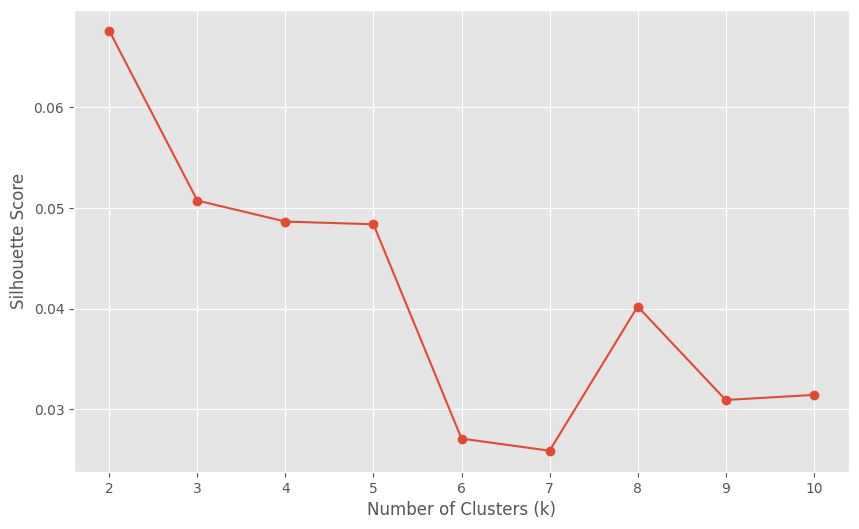

In [8]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Load your data into a DataFrame (assuming it's already loaded as 'df')
# df = pd.read_csv('your_dataset.csv')  # Uncomment this line and replace 'your_dataset.csv' with your actual file path if your data is in a CSV file

# Extract the 'new_title' column from the DataFrame
titles = df['new_title']

# Initialize CountVectorizer
count_vectorizer = CountVectorizer()

# Fit and transform the 'new_title' data using CountVectorizer
count_vectorized_data = count_vectorizer.fit_transform(titles)

# Calculate silhouette score for different values of k
silhouette_scores = []
possible_k_values = range(2, 11)

for k in possible_k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(count_vectorized_data)
    silhouette_avg = silhouette_score(count_vectorized_data, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    print(f"Silhouette Score for {k} clusters: {silhouette_avg}")

# Plot the silhouette scores
plt.figure(figsize=(10, 6))
plt.plot(possible_k_values, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
#plt.title('Silhouette Score for Count Vectorizer Data')
plt.grid(True)
plt.show()


In [9]:
plt.savefig('silhouette_scores_hd.png', dpi=600)
plt.show()

<Figure size 640x480 with 0 Axes>

Silhouette Score for 2 clusters: 0.04215265442449986
Silhouette Score for 3 clusters: 0.03633634217289379
Silhouette Score for 4 clusters: 0.05005355346909162
Silhouette Score for 5 clusters: 0.03354921027795568
Silhouette Score for 6 clusters: 0.03246851938565289
Silhouette Score for 7 clusters: 0.04117978451985896
Silhouette Score for 8 clusters: 0.02307544130892089
Silhouette Score for 9 clusters: 0.03170265407153143
Silhouette Score for 10 clusters: 0.021020795764742015


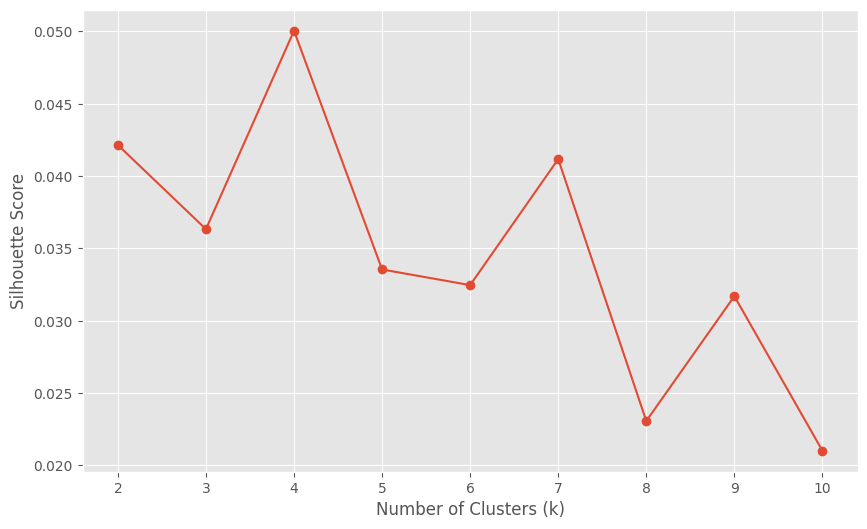

In [10]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import OneHotEncoder
from scipy.sparse import hstack
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Load your data into a DataFrame (assuming it's already loaded as 'df')
# df = pd.read_csv('your_dataset.csv')  # Uncomment this line and replace 'your_dataset.csv' with your actual file path if your data is in a CSV file

# Extract 'new_title' and 'IPO_LOCATION' columns from the DataFrame
titles = df['new_title']
locations = df[['IPO_LOCATION','FIELD_OF_INVENTION']]

# Initialize CountVectorizer for 'new_title'
title_vectorizer = CountVectorizer()

# Initialize OneHotEncoder for 'IPO_LOCATION'
location_encoder = OneHotEncoder()

# Apply CountVectorizer to 'new_title'
title_vectorized_data = title_vectorizer.fit_transform(titles)

# Apply OneHotEncoder to 'IPO_LOCATION'
location_encoded_data = location_encoder.fit_transform(locations)

# Combine the sparse matrices using hstack
combined_data = hstack([title_vectorized_data, location_encoded_data])

# Calculate silhouette score for different values of k
silhouette_scores = []
possible_k_values = range(2, 11)

for k in possible_k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(combined_data)
    silhouette_avg = silhouette_score(combined_data, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    print(f"Silhouette Score for {k} clusters: {silhouette_avg}")

# Plot the silhouette scores
plt.figure(figsize=(10, 6))
plt.plot(possible_k_values, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
#plt.title('Silhouette Score for Count Vectorizer Data and One-Hot Encoded IPO Location Field of Invention')
plt.grid(True)
plt.show()


Silhouette Score for 2 clusters: 0.04748171480861377
Silhouette Score for 3 clusters: 0.04213560455275175
Silhouette Score for 4 clusters: 0.07241491519879732
Silhouette Score for 5 clusters: 0.04806149901851472
Silhouette Score for 6 clusters: 0.047372621272003854
Silhouette Score for 7 clusters: 0.05147470113308362
Silhouette Score for 8 clusters: 0.05214787853507344
Silhouette Score for 9 clusters: 0.04423172454925464
Silhouette Score for 10 clusters: 0.05050436120790201


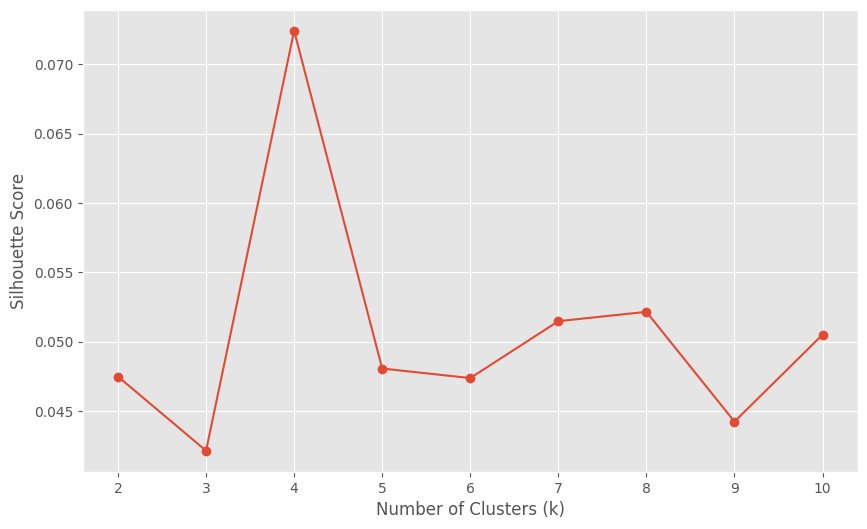

In [11]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import OneHotEncoder
from scipy.sparse import hstack
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Load your data into a DataFrame (assuming it's already loaded as 'df')
# df = pd.read_csv('your_dataset.csv')  # Uncomment this line and replace 'your_dataset.csv' with your actual file path if your data is in a CSV file

# Extract 'new_title' and 'IPO_LOCATION' columns from the DataFrame
titles = df['new_title']
locations = df[['IPO_LOCATION']]

# Initialize CountVectorizer for 'new_title'
title_vectorizer = CountVectorizer()

# Initialize OneHotEncoder for 'IPO_LOCATION'
location_encoder = OneHotEncoder()

# Apply CountVectorizer to 'new_title'
title_vectorized_data = title_vectorizer.fit_transform(titles)

# Apply OneHotEncoder to 'IPO_LOCATION'
location_encoded_data = location_encoder.fit_transform(locations)

# Combine the sparse matrices using hstack
combined_data = hstack([title_vectorized_data, location_encoded_data])

# Calculate silhouette score for different values of k
silhouette_scores = []
possible_k_values = range(2, 11)

for k in possible_k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(combined_data)
    silhouette_avg = silhouette_score(combined_data, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    print(f"Silhouette Score for {k} clusters: {silhouette_avg}")

# Plot the silhouette scores
plt.figure(figsize=(10, 6))
plt.plot(possible_k_values, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
#plt.title('Silhouette Score for Count Vectorizer Data and One-Hot Encoded IPO Location')
plt.grid(True)
plt.show()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Silhouette Score for 2 clusters: 0.8728699848210556
Silhouette Score for 3 clusters: 0.7119384448230607
Silhouette Score for 4 clusters: 0.5838543719410209
Silhouette Score for 5 clusters: 0.5349704542547798
Silhouette Score for 6 clusters: 0.4642925657340596
Silhouette Score for 7 clusters: 0.4476649520983137
Silhouette Score for 8 clusters: 0.44594752321642256
Silhouette Score for 9 clusters: 0.3833847967044478
Silhouette Score for 10 clusters: 0.38549941089317885


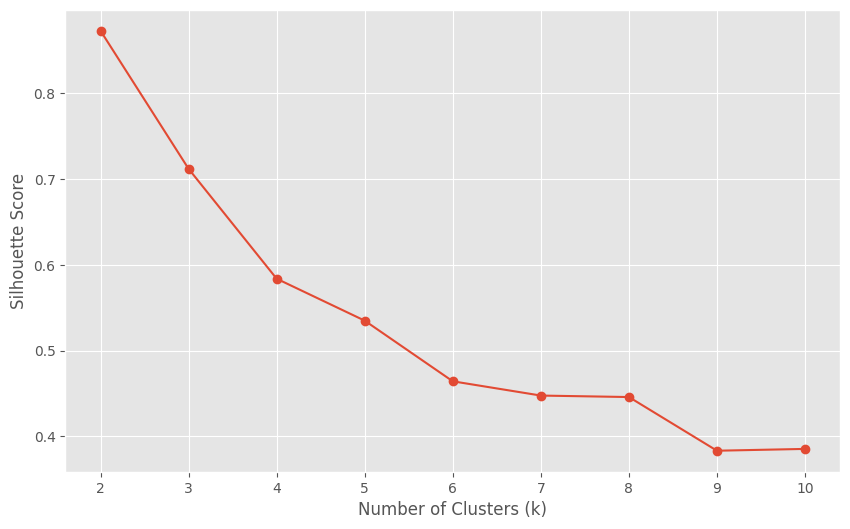

In [16]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import OneHotEncoder
from scipy.sparse import hstack
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Mounting google drive
from google.colab import drive
drive.mount('/content/drive')

# Load data from Excel file and preprocess
df = pd.read_excel('/content/drive/MyDrive/Patent_paper/data.xlsx')
df.dropna(inplace=True)
df['new_title'] = df['TITLE_OF_INVENTION'].astype(str).apply(transform_text)

# Extract 'new_title', 'IPO_LOCATION', 'NO_OF_PAGES', and 'NO_OF_CLAIMS' columns
titles = df['new_title']
locations = df[['IPO_LOCATION','FIELD_OF_INVENTION']]
no_of_pages = df['NO_OF_PAGES'].values.reshape(-1, 1)
no_of_claims = df['NO_OF_CLAIMS'].values.reshape(-1, 1)

# Initialize CountVectorizer for 'new_title'
title_vectorizer = CountVectorizer()

# Initialize OneHotEncoder for 'IPO_LOCATION'
location_encoder = OneHotEncoder()

# Apply CountVectorizer to 'new_title'
title_count_data = title_vectorizer.fit_transform(titles)

# Apply OneHotEncoder to 'IPO_LOCATION'
location_encoded_data = location_encoder.fit_transform(locations)

# Combine 'title_count_data', 'location_encoded_data', 'no_of_pages', and 'no_of_claims' using hstack
combined_data = hstack([title_count_data, location_encoded_data, no_of_pages, no_of_claims])

# Calculate silhouette score for different values of k
silhouette_scores = []
possible_k_values = range(2, 11)

for k in possible_k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(combined_data)
    silhouette_avg = silhouette_score(combined_data, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    print(f"Silhouette Score for {k} clusters: {silhouette_avg}")

# Plot the silhouette scores
plt.figure(figsize=(10, 6))
plt.plot(possible_k_values, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
#plt.title('Silhouette Score for Count Vectorized Data, One-Hot Encoded IPO Location, NO_OF_PAGES,  NO_OF_CLAIMS,Feild of Invention')
plt.grid(True)
plt.show()

In [28]:
print("Number of rows in title_count_data:", title_count_data.shape[0])
print("Number of rows in location_encoded_data:", location_encoded_data.shape[0])
print("Number of rows in no_of_pages:", no_of_pages.shape[0])
print("Number of rows in no_of_claims:", no_of_claims.shape[0])
# If you are using FIELD_OF_INVENTION, print its number of rows as well


Number of rows in title_count_data: 35140
Number of rows in location_encoded_data: 35140
Number of rows in no_of_pages: 35140
Number of rows in no_of_claims: 35140


In [29]:
k_optimal = silhouette_scores.index(max(silhouette_scores)) + 2
kmeans = KMeans(n_clusters=k_optimal, random_state=42)
cluster_labels = kmeans.fit_predict(combined_data)

# Add cluster labels to the original DataFrame
df['Cluster_Labels'] = cluster_labels


In [30]:
# Group data by cluster labels
grouped_data = df.groupby('Cluster_Labels')

# Iterate through each cluster and access the data
for cluster_label, cluster_data in grouped_data:
    print(f'Cluster {cluster_label}:')
    print(cluster_data)


Cluster 0:
        PUBLICATION_NUMBER PUBLICATION_DATE IPO_LOCATION  \
0      2023-01-01 00:00:00       2023-01-06       Mumbai   
1      2023-01-01 00:00:00       2023-01-06        Delhi   
2      2023-01-01 00:00:00       2023-01-06        Delhi   
3      2023-01-01 00:00:00       2023-01-06        Delhi   
4      2023-01-01 00:00:00       2023-01-06        Delhi   
...                    ...              ...          ...   
35201              37/2023       2023-09-15      Chennai   
35202              37/2023       2023-09-15      Chennai   
35203              37/2023       2023-09-15      Chennai   
35204              37/2023       2023-09-15        Delhi   
35205              37/2023       2023-09-15        Delhi   

                APPLICATION_TYPE_DESC APPLICATION_NUMBER DATE_OF_FILING  \
0      PCT NATIONAL PHASE APPLICATION      10/MUMNP/2013     2013-01-02   
1      PCT NATIONAL PHASE APPLICATION   10044/DELNP/2015     2015-10-27   
2      PCT NATIONAL PHASE APPLICATION   100

In [31]:
for cluster_label, cluster_data in grouped_data:
    # Export cluster data to Excel
    cluster_data.to_excel(f'cluster_{cluster_label}_data.xlsx', index=False)
    # Alternatively, export to CSV
    # cluster_data.to_csv(f'cluster_{cluster_label}_data.csv', index=False)


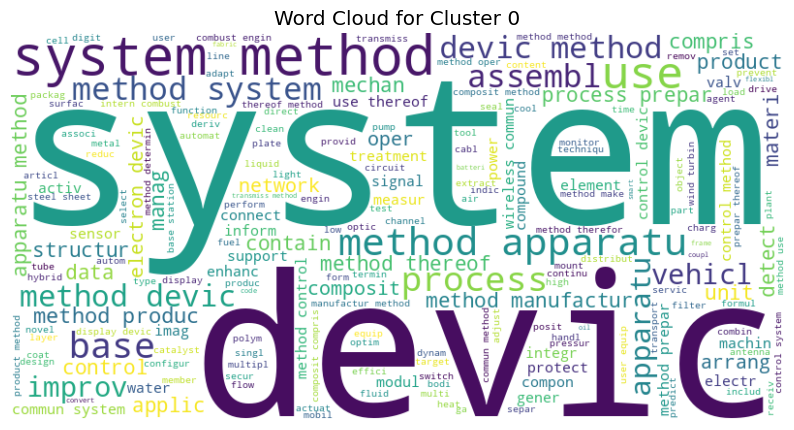

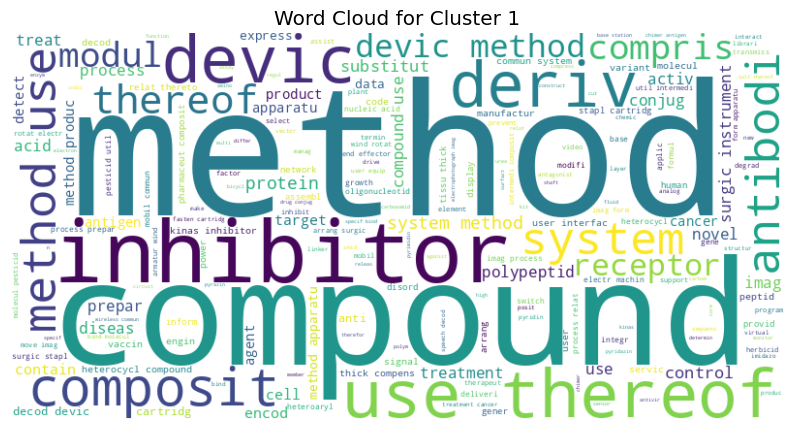

In [32]:
# Assuming you have cluster labels in 'Cluster_Labels' column of your DataFrame
grouped_data = df.groupby('Cluster_Labels')

# Function to generate and display word cloud for a given cluster
def generate_word_cloud(cluster_data, cluster_label):
    text_data = ' '.join(cluster_data['new_title'])  # Assuming 'new_title' contains text data
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_data)

    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud for Cluster {cluster_label}')
    plt.show()

# Generate word clouds for each cluster
for cluster_label, cluster_data in grouped_data:
    generate_word_cloud(cluster_data, cluster_label)


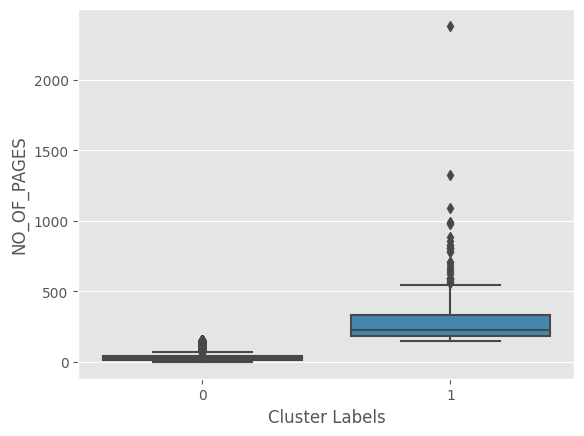

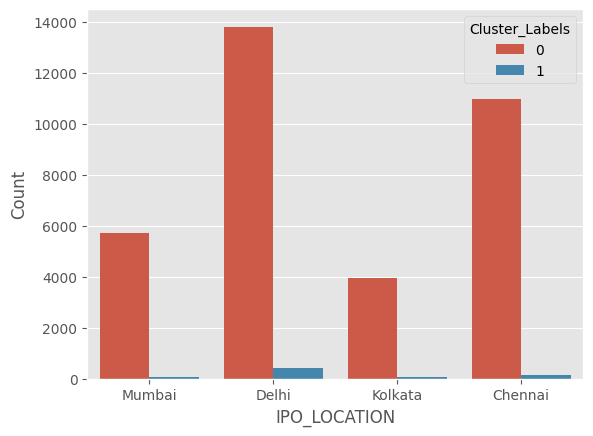

In [34]:
cluster_statistics = df.groupby('Cluster_Labels').describe()
import seaborn as sns

# Box plot for numerical feature 'NO_OF_PAGES'
sns.boxplot(x='Cluster_Labels', y='NO_OF_PAGES', data=df)
plt.xlabel('Cluster Labels')
plt.ylabel('NO_OF_PAGES')
plt.show()

# Bar chart for categorical feature 'IPO_LOCATION'
sns.countplot(x='IPO_LOCATION', hue='Cluster_Labels', data=df)
plt.xlabel('IPO_LOCATION')
plt.ylabel('Count')
plt.show()


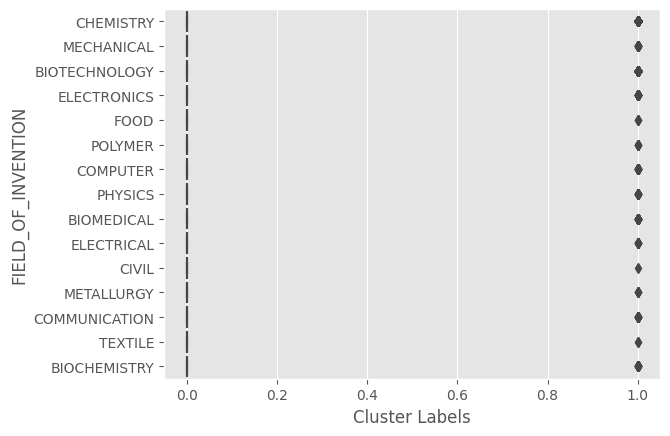

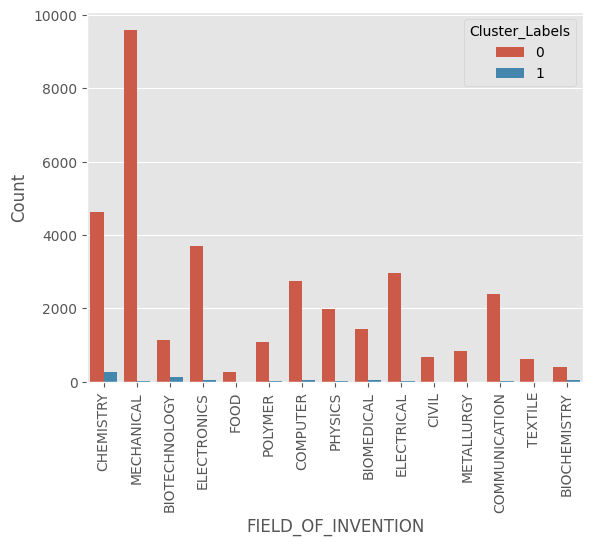

In [45]:
# Box plot for numerical feature 'FIELD_OF_INVENTION'
sns.boxplot(x='Cluster_Labels', y='FIELD_OF_INVENTION', data=df)
plt.xlabel('Cluster Labels')
plt.ylabel('FIELD_OF_INVENTION')
plt.show()
# Count plot for categorical feature 'FIELD_OF_INVENTION'
sns.countplot(x='FIELD_OF_INVENTION', hue='Cluster_Labels', data=df)
plt.xlabel('FIELD_OF_INVENTION')
plt.ylabel('Count')
plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility if needed
plt.show()



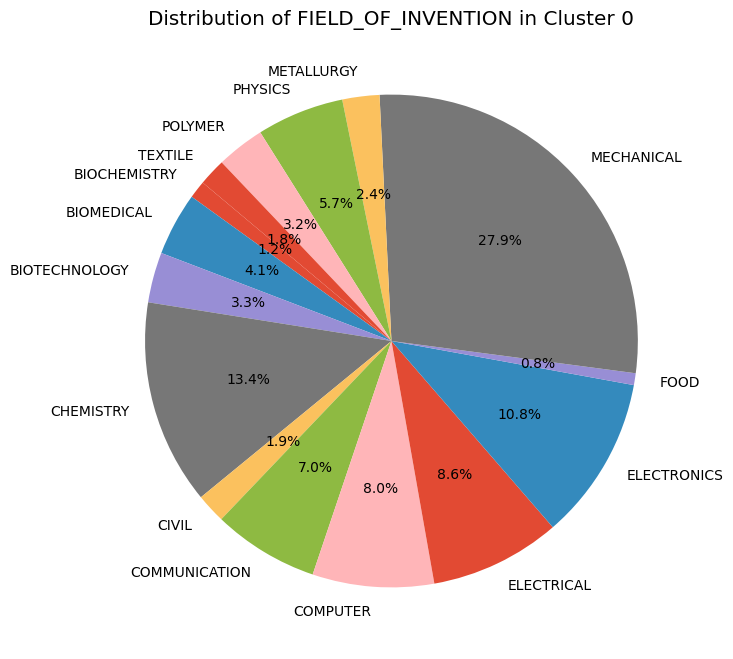

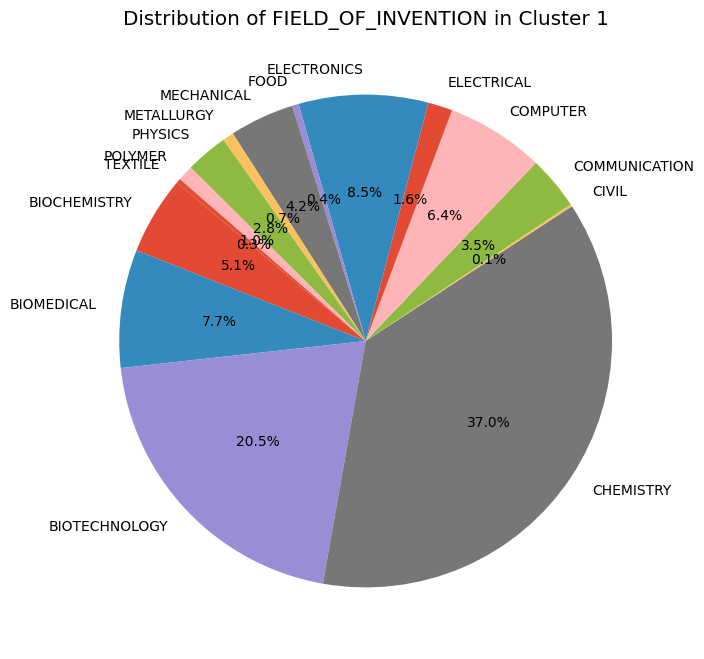

In [47]:
import matplotlib.pyplot as plt

# Group data by cluster labels and 'FIELD_OF_INVENTION'
cluster_field_counts = df.groupby(['Cluster_Labels', 'FIELD_OF_INVENTION']).size().reset_index(name='Count')

# Determine unique cluster labels
unique_clusters = cluster_field_counts['Cluster_Labels'].unique()

# Plot pie charts for each cluster
for cluster_number in unique_clusters:
    cluster_data = cluster_field_counts[cluster_field_counts['Cluster_Labels'] == cluster_number]

    # Data for the pie chart
    labels = cluster_data['FIELD_OF_INVENTION']
    sizes = cluster_data['Count']

    # Plotting the pie chart
    plt.figure(figsize=(8, 8))
    plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
    plt.title(f'Distribution of FIELD_OF_INVENTION in Cluster {cluster_number}')
    plt.show()


In [49]:
import pandas as pd

# Group data by cluster labels and 'FIELD_OF_INVENTION'
cluster_field_counts = df.groupby(['Cluster_Labels', 'FIELD_OF_INVENTION']).size().reset_index(name='Count')

# Determine unique cluster labels
unique_clusters = cluster_field_counts['Cluster_Labels'].unique()

# Create a dictionary to store cluster-wise data
cluster_data_dict = {}

# Populate the dictionary with data for each cluster
for cluster_number in unique_clusters:
    cluster_data = cluster_field_counts[cluster_field_counts['Cluster_Labels'] == cluster_number]
    cluster_data_dict[f'Cluster {cluster_number}'] = cluster_data.set_index('FIELD_OF_INVENTION')['Count'].to_dict()

# Create a DataFrame from the dictionary
cluster_data_df = pd.DataFrame(cluster_data_dict).fillna(0)  # Fill NaN values with 0

# Display the DataFrame as a table
cluster_data_df


,Cluster 0,Cluster 1
BIOCHEMISTRY,399,35
BIOMEDICAL,1427,53
BIOTECHNOLOGY,1137,140
CHEMISTRY,4632,253
CIVIL,668,1
COMMUNICATION,2395,24
COMPUTER,2745,44
ELECTRICAL,2955,11
ELECTRONICS,3711,58
FOOD,267,3


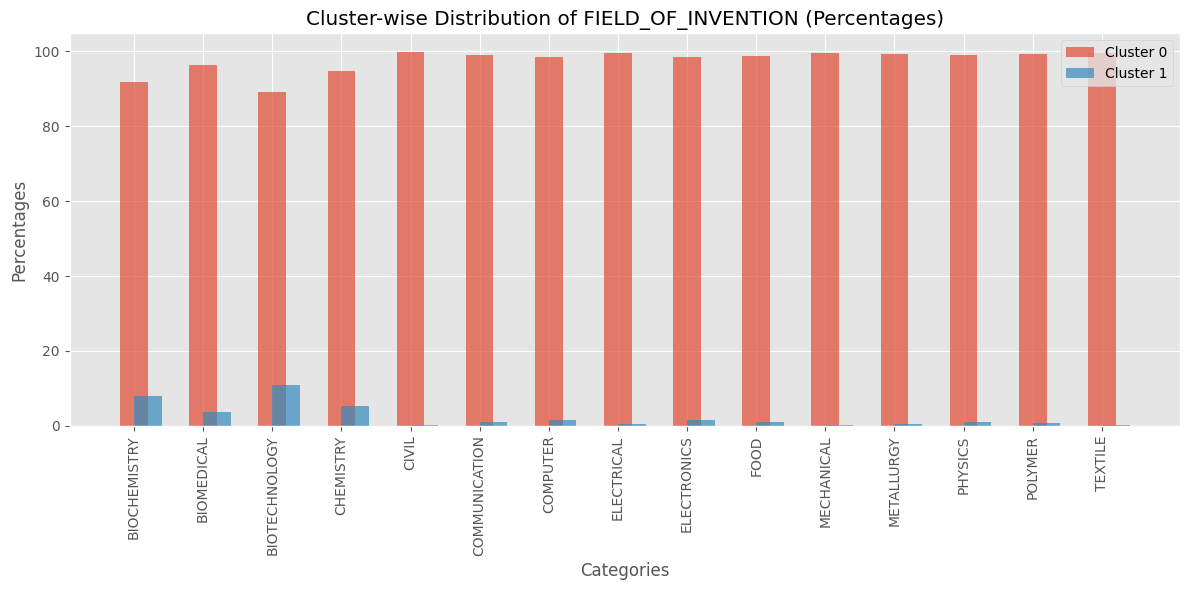

In [56]:
import matplotlib.pyplot as plt
import numpy as np

# Data
categories = ['BIOCHEMISTRY', 'BIOMEDICAL', 'BIOTECHNOLOGY', 'CHEMISTRY', 'CIVIL', 'COMMUNICATION',
              'COMPUTER', 'ELECTRICAL', 'ELECTRONICS', 'FOOD', 'MECHANICAL', 'METALLURGY',
              'PHYSICS', 'POLYMER', 'TEXTILE']
cluster_0_counts = np.array([399, 1427, 1137, 4632, 668, 2395, 2745, 2955, 3711, 267, 9600, 839, 1974, 1090, 617])
cluster_1_counts = np.array([35, 53, 140, 253, 1, 24, 44, 11, 58, 3, 29, 5, 19, 7, 2])

# Calculate percentages
total_counts = cluster_0_counts + cluster_1_counts
cluster_0_percentages = (cluster_0_counts / total_counts) * 100
cluster_1_percentages = (cluster_1_counts / total_counts) * 100

x = range(len(categories))

# Stacked bar chart for percentages
plt.figure(figsize=(12, 6))
plt.bar(x, cluster_0_percentages, width=0.4, label='Cluster 0', align='center', alpha=0.7)
plt.bar(x, cluster_1_percentages, width=0.4, label='Cluster 1', align='edge', alpha=0.7)

plt.xlabel('Categories')
plt.ylabel('Percentages')
plt.title('Cluster-wise Distribution of FIELD_OF_INVENTION (Percentages)')
plt.xticks(x, categories, rotation='vertical')
plt.legend()
plt.tight_layout()
plt.show()


In [58]:
import pandas as pd

# Data
categories = ['BIOCHEMISTRY', 'BIOMEDICAL', 'BIOTECHNOLOGY', 'CHEMISTRY', 'CIVIL', 'COMMUNICATION',
              'COMPUTER', 'ELECTRICAL', 'ELECTRONICS', 'FOOD', 'MECHANICAL', 'METALLURGY',
              'PHYSICS', 'POLYMER', 'TEXTILE']
cluster_0_percentages = np.array([28.4, 59.2, 89.0, 94.8, 99.9, 99.0, 98.4, 99.6, 98.7, 98.9, 99.7, 99.4, 99.0, 99.4, 99.7])
cluster_1_percentages = np.array([71.6, 40.8, 11.0, 5.2, 0.1, 1.0, 1.6, 0.4, 1.3, 1.1, 0.3, 0.6, 1.0, 0.6, 0.3])

# Create a DataFrame
data = {
    'Categories': categories,
    'Cluster 0 (%)': cluster_0_percentages,
    'Cluster 1 (%)': cluster_1_percentages
}

cluster_table_df = pd.DataFrame(data)

# Display the DataFrame as a table
cluster_table_df


,Categories,Cluster 0 (%),Cluster 1 (%)
0,BIOCHEMISTRY,28.4,71.6
1,BIOMEDICAL,59.2,40.8
2,BIOTECHNOLOGY,89.0,11.0
3,CHEMISTRY,94.8,5.2
4,CIVIL,99.9,0.1
5,COMMUNICATION,99.0,1.0
6,COMPUTER,98.4,1.6
7,ELECTRICAL,99.6,0.4
8,ELECTRONICS,98.7,1.3
9,FOOD,98.9,1.1


In [54]:
# Group data by cluster labels and 'FIELD_OF_INVENTION', 'IPO_LOCATION'
cluster_categorical_counts = df.groupby(['Cluster_Labels', 'FIELD_OF_INVENTION', 'IPO_LOCATION']).size().reset_index(name='Count')

# Display cluster-wise categorical data
cluster_categorical_counts


,Cluster_Labels,FIELD_OF_INVENTION,IPO_LOCATION,Count
0,0,BIOCHEMISTRY,Chennai,74
1,0,BIOCHEMISTRY,Delhi,214
2,0,BIOCHEMISTRY,Kolkata,41
3,0,BIOCHEMISTRY,Mumbai,70
4,0,BIOMEDICAL,Chennai,409
...,...,...,...,...
98,1,PHYSICS,Mumbai,2
99,1,POLYMER,Delhi,2
100,1,POLYMER,Kolkata,5
101,1,TEXTILE,Chennai,1


In [40]:
for cluster_label, cluster_data in df.groupby('Cluster_Labels'):
    print(f'Cluster {cluster_label}:')
    print(cluster_data.sample(5))  # Print a sample of 5 data points from each cluster



Cluster 0:
      PUBLICATION_NUMBER PUBLICATION_DATE IPO_LOCATION  \
14578            18/2023       2023-05-05        Delhi   
31089            35/2023       2023-09-01        Delhi   
33514            36/2023       2023-09-08      Chennai   
11804            14/2023       2023-04-07        Delhi   
30396            34/2023       2023-08-25      Chennai   

                APPLICATION_TYPE_DESC APPLICATION_NUMBER DATE_OF_FILING  \
14578          CONVENTION APPLICATION       202000000000     2018-12-17   
31089  PCT NATIONAL PHASE APPLICATION       202000000000     2017-11-30   
33514            ORDINARY APPLICATION      4055/CHE/2013     2013-09-11   
11804          CONVENTION APPLICATION      1227/DEL/2012     2012-04-20   
30396  PCT NATIONAL PHASE APPLICATION       202000000000     2020-02-18   

                                      TITLE_OF_INVENTION FIELD_OF_INVENTION  \
14578  INTRAOCULAR LENS PLATFORM HAVING IMPROVED HAPT...         BIOMEDICAL   
31089                THREE DIME

# Cluster Profiling:
# Understand the characteristics of each cluster by looking at the average values of features within each cluster.

In [41]:
cluster_profiles = df.groupby('Cluster_Labels').mean()
print(cluster_profiles)


                NO_OF_PAGES  NO_OF_CLAIMS
Cluster_Labels                           
0                 33.124826     16.609502
1                280.789474     48.290936


# **tfidf**

Silhouette Score for 2 clusters: 0.004279933310510765
Silhouette Score for 3 clusters: 0.006040125713636937
Silhouette Score for 4 clusters: 0.007638948365716148
Silhouette Score for 5 clusters: 0.008809664360080613
Silhouette Score for 6 clusters: 0.009984829753798337
Silhouette Score for 7 clusters: 0.010061766733650989
Silhouette Score for 8 clusters: 0.011732693202301364
Silhouette Score for 9 clusters: 0.009668739575681701
Silhouette Score for 10 clusters: 0.009646508012129767


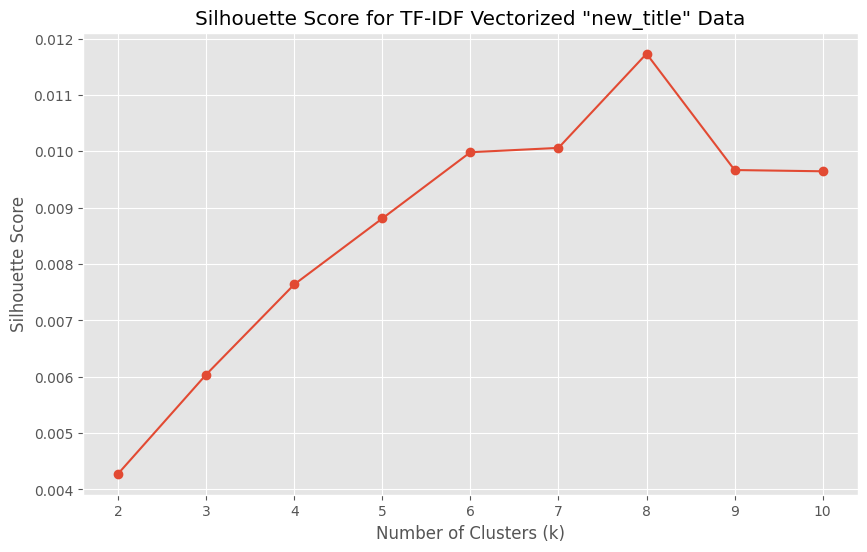

In [59]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Assuming 'df' contains the DataFrame with the 'new_title' column
titles = df['new_title']

# Initialize TF-IDF Vectorizer for 'new_title'
title_vectorizer = TfidfVectorizer()

# Apply TF-IDF Vectorization to 'new_title'
title_tfidf_data = title_vectorizer.fit_transform(titles)

# Calculate silhouette score for different values of k
silhouette_scores = []
possible_k_values = range(2, 11)

for k in possible_k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(title_tfidf_data)
    silhouette_avg = silhouette_score(title_tfidf_data, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    print(f"Silhouette Score for {k} clusters: {silhouette_avg}")

# Plot the silhouette scores
plt.figure(figsize=(10, 6))
plt.plot(possible_k_values, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for TF-IDF Vectorized "new_title" Data')
plt.grid(True)
plt.show()


Silhouette Score for 2 clusters: 0.1281006513608261
Silhouette Score for 3 clusters: 0.16982575752163143
Silhouette Score for 4 clusters: 0.19505743456480204
Silhouette Score for 5 clusters: 0.14243476488169873
Silhouette Score for 6 clusters: 0.11402745472957851
Silhouette Score for 7 clusters: 0.13398485797823154
Silhouette Score for 8 clusters: 0.1416276708687199
Silhouette Score for 9 clusters: 0.14773372393747392
Silhouette Score for 10 clusters: 0.1444827778009525


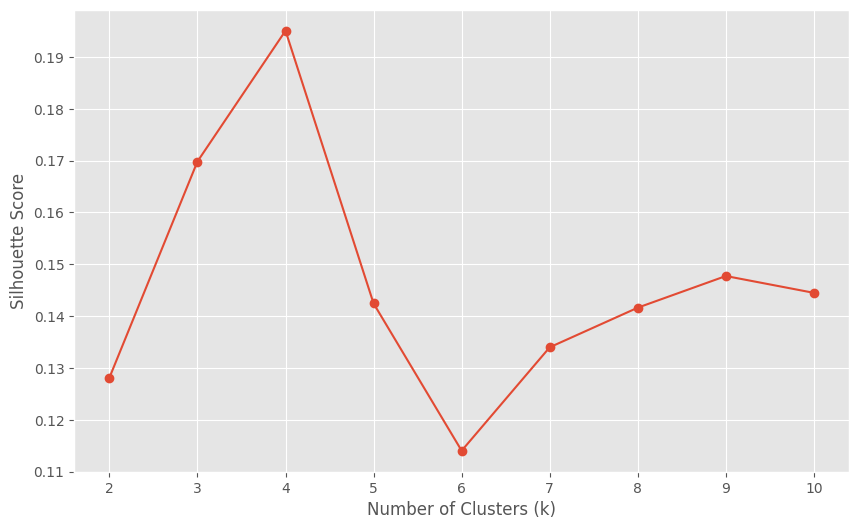

In [60]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import OneHotEncoder
from scipy.sparse import hstack
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Load your data into a DataFrame (assuming it's already loaded as 'df')
# df = pd.read_csv('your_dataset.csv')  # Uncomment this line and replace 'your_dataset.csv' with your actual file path if your data is in a CSV file

# Extract 'new_title' and 'IPO_LOCATION' columns from the DataFrame
titles = df['new_title']
locations = df[['IPO_LOCATION','FIELD_OF_INVENTION']]

# Initialize TF-IDF Vectorizer for 'new_title'
title_vectorizer = TfidfVectorizer()

# Initialize OneHotEncoder for 'IPO_LOCATION'
location_encoder = OneHotEncoder()

# Apply TF-IDF Vectorization to 'new_title'
title_tfidf_data = title_vectorizer.fit_transform(titles)

# Apply OneHotEncoder to 'IPO_LOCATION'
location_encoded_data = location_encoder.fit_transform(locations)

# Combine the sparse matrices using hstack
combined_data = hstack([title_tfidf_data, location_encoded_data])

# Calculate silhouette score for different values of k
silhouette_scores = []
possible_k_values = range(2, 11)

for k in possible_k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(combined_data)
    silhouette_avg = silhouette_score(combined_data, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    print(f"Silhouette Score for {k} clusters: {silhouette_avg}")

# Plot the silhouette scores
plt.figure(figsize=(10, 6))
plt.plot(possible_k_values, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
#plt.title('Silhouette Score for TF-IDF Vectorized Data and One-Hot Encoded IPO Location and Feild of Invention')
plt.grid(True)
plt.show()


Silhouette Score for 2 clusters: 0.18912656881987955
Silhouette Score for 3 clusters: 0.25519207500999075
Silhouette Score for 4 clusters: 0.29476195902071417
Silhouette Score for 5 clusters: 0.17645461223489453
Silhouette Score for 6 clusters: 0.08410059250837891
Silhouette Score for 7 clusters: 0.0850735099593665
Silhouette Score for 8 clusters: 0.08526494593964823
Silhouette Score for 9 clusters: 0.08580475762232322
Silhouette Score for 10 clusters: 0.08586595272512557


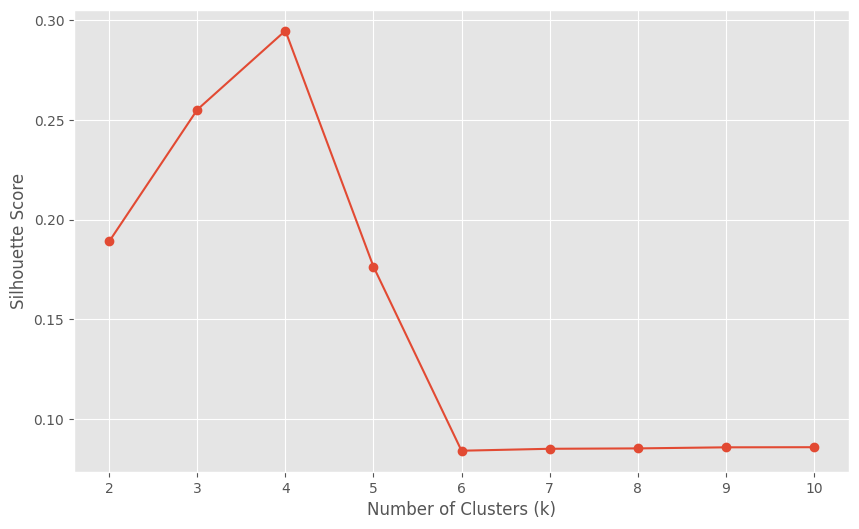

In [61]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import OneHotEncoder
from scipy.sparse import hstack
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Load your data into a DataFrame (assuming it's already loaded as 'df')
# df = pd.read_csv('your_dataset.csv')  # Uncomment this line and replace 'your_dataset.csv' with your actual file path if your data is in a CSV file

# Extract 'new_title' and 'IPO_LOCATION' columns from the DataFrame
titles = df['new_title']
locations = df[['IPO_LOCATION']]

# Initialize TF-IDF Vectorizer for 'new_title'
title_vectorizer = TfidfVectorizer()

# Initialize OneHotEncoder for 'IPO_LOCATION'
location_encoder = OneHotEncoder()

# Apply TF-IDF Vectorization to 'new_title'
title_tfidf_data = title_vectorizer.fit_transform(titles)

# Apply OneHotEncoder to 'IPO_LOCATION'
location_encoded_data = location_encoder.fit_transform(locations)

# Combine the sparse matrices using hstack
combined_data = hstack([title_tfidf_data, location_encoded_data])

# Calculate silhouette score for different values of k
silhouette_scores = []
possible_k_values = range(2, 11)

for k in possible_k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(combined_data)
    silhouette_avg = silhouette_score(combined_data, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    print(f"Silhouette Score for {k} clusters: {silhouette_avg}")

# Plot the silhouette scores
plt.figure(figsize=(10, 6))
plt.plot(possible_k_values, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
#plt.title('Silhouette Score for TF-IDF Vectorized Data and One-Hot Encoded IPO Location ')
plt.grid(True)
plt.show()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Silhouette Score for 2 clusters: 0.8742806071774215
Silhouette Score for 3 clusters: 0.7160537799964463
Silhouette Score for 4 clusters: 0.5960821274983021
Silhouette Score for 5 clusters: 0.5442323864233015
Silhouette Score for 6 clusters: 0.46334831945595545
Silhouette Score for 7 clusters: 0.4603401098293501
Silhouette Score for 8 clusters: 0.457790441951988
Silhouette Score for 9 clusters: 0.4008943360260043
Silhouette Score for 10 clusters: 0.3997450332754652


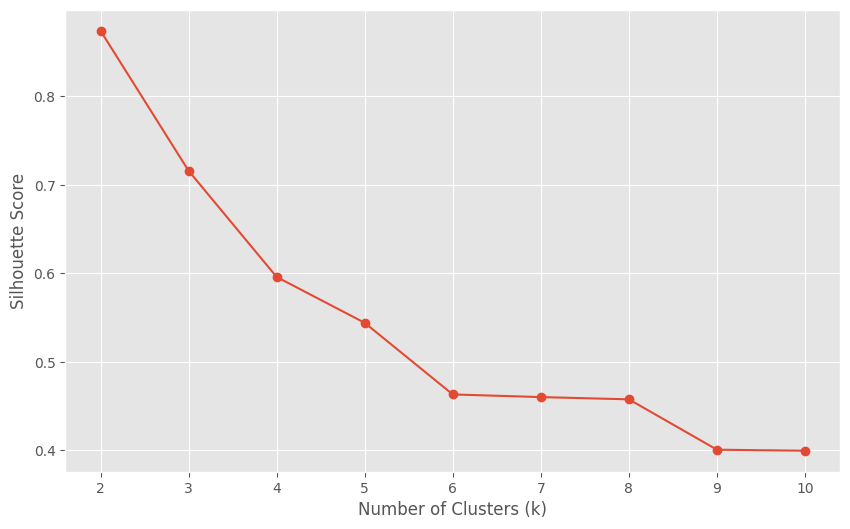

In [62]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import OneHotEncoder
from scipy.sparse import hstack
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Mounting google drive


# Mounting google drive
from google.colab import drive
drive.mount('/content/drive')

df = pd.read_excel('/content/drive/MyDrive/Patent_paper/data.xlsx')
df.dropna(inplace=True)

df['new_title'] = df['TITLE_OF_INVENTION'].astype(str).apply(transform_text)

# Sample data

# Create a DataFrame from the sample data


# Extract 'new_title', 'IPO_LOCATION', 'NO_OF_PAGES', and 'NO_OF_CLAIMS' columns
titles = df['new_title']
locations = df[['IPO_LOCATION','FIELD_OF_INVENTION']]
no_of_pages = df['NO_OF_PAGES'].values.reshape(-1, 1)
no_of_claims = df['NO_OF_CLAIMS'].values.reshape(-1, 1)

# Initialize TF-IDF Vectorizer for 'new_title'
title_vectorizer = TfidfVectorizer()

# Initialize OneHotEncoder for 'IPO_LOCATION'
location_encoder = OneHotEncoder()

# Apply TF-IDF Vectorization to 'new_title'
title_tfidf_data = title_vectorizer.fit_transform(titles)

# Apply OneHotEncoder to 'IPO_LOCATION'
location_encoded_data = location_encoder.fit_transform(locations)

# Combine 'title_tfidf_data', 'location_encoded_data', 'no_of_pages', and 'no_of_claims' using hstack
combined_data = hstack([title_tfidf_data, location_encoded_data, no_of_pages, no_of_claims])

# Calculate silhouette score for different values of k
silhouette_scores = []
possible_k_values = range(2, 11)

for k in possible_k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(combined_data)
    silhouette_avg = silhouette_score(combined_data, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    print(f"Silhouette Score for {k} clusters: {silhouette_avg}")

# Plot the silhouette scores
plt.figure(figsize=(10, 6))
plt.plot(possible_k_values, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
#plt.title('Silhouette Score for TF-IDF Vectorized Data, One-Hot Encoded IPO Location, NO_OF_PAGES, and NO_OF_CLAIMS,FIELD_OF_INVENTION')
plt.grid(True)
plt.show()


In [92]:
k_optimal = silhouette_scores.index(max(silhouette_scores)) + 2
kmeans = KMeans(n_clusters=k_optimal, random_state=42)
cluster_labels = kmeans.fit_predict(combined_data)

# Add cluster labels to the original DataFrame
df['Cluster_Labels'] = cluster_labels
# Group data by cluster labels
grouped_data = df.groupby('Cluster_Labels')

# Iterate through each cluster and access the data
for cluster_label, cluster_data in grouped_data:
    print(f'Cluster {cluster_label}:')
    print(cluster_data)


Cluster 0:
        PUBLICATION_NUMBER PUBLICATION_DATE IPO_LOCATION  \
22     2023-01-01 00:00:00       2023-01-06      Chennai   
57     2023-01-01 00:00:00       2023-01-06        Delhi   
72     2023-01-01 00:00:00       2023-01-06      Kolkata   
100    2023-01-01 00:00:00       2023-01-06        Delhi   
134    2023-01-01 00:00:00       2023-01-06       Mumbai   
...                    ...              ...          ...   
35108              37/2023       2023-09-15       Mumbai   
35140              37/2023       2023-09-15        Delhi   
35143              37/2023       2023-09-15        Delhi   
35172              37/2023       2023-09-15       Mumbai   
35177              37/2023       2023-09-15      Chennai   

                APPLICATION_TYPE_DESC APPLICATION_NUMBER DATE_OF_FILING  \
22     PCT NATIONAL PHASE APPLICATION    1068/CHENP/2013     2013-02-08   
57     PCT NATIONAL PHASE APPLICATION    1240/DELNP/2012     2012-02-10   
72     PCT NATIONAL PHASE APPLICATION    14

In [93]:
for cluster_label, cluster_data in grouped_data:
    # Export cluster data to Excel
    cluster_data.to_excel(f'cluster_{cluster_label}_data.xlsx', index=False)
    # Alternatively, export to CSV
    # cluster_data.to_csv(f'cluster_{cluster_label}_data.csv', index=False)


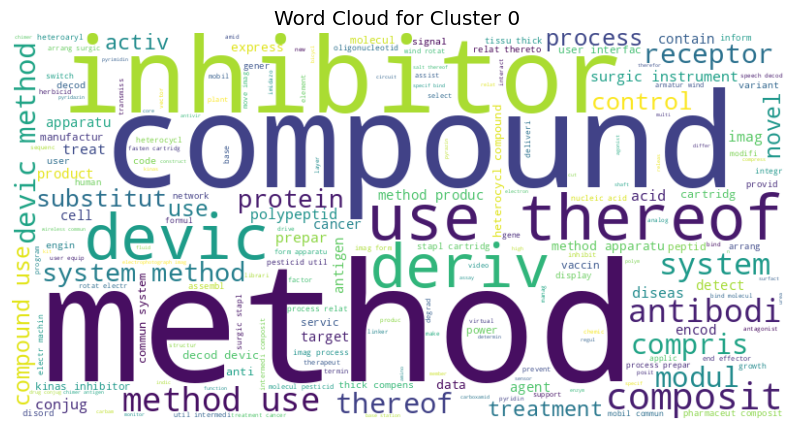

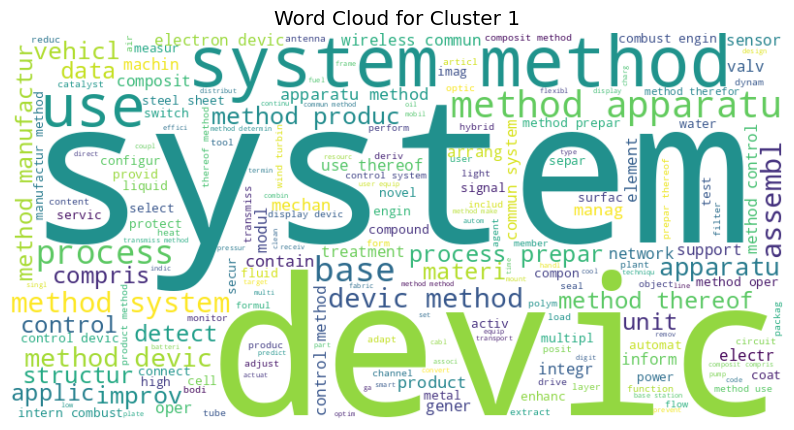

In [95]:
# Assuming you have cluster labels in 'Cluster_Labels' column of your DataFrame
grouped_data = df.groupby('Cluster_Labels')

# Function to generate and display word cloud for a given cluster
def generate_word_cloud(cluster_data, cluster_label):
    text_data = ' '.join(cluster_data['new_title'])  # Assuming 'new_title' contains text data
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_data)

    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud for Cluster {cluster_label}')
    plt.show()

# Generate word clouds for each cluster
for cluster_label, cluster_data in grouped_data:
    generate_word_cloud(cluster_data, cluster_label)

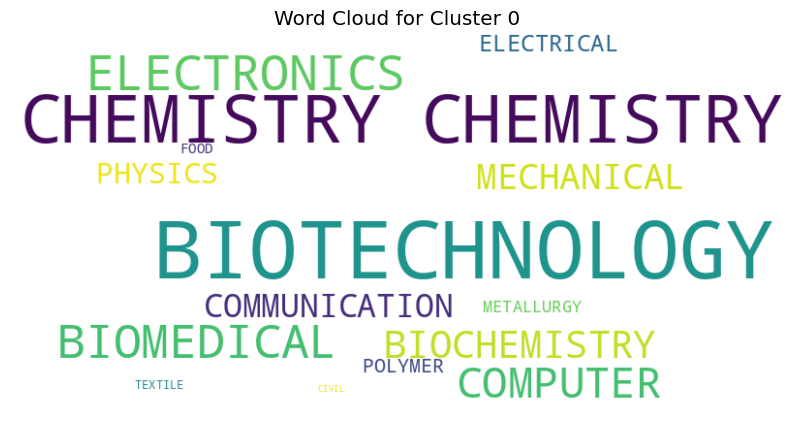

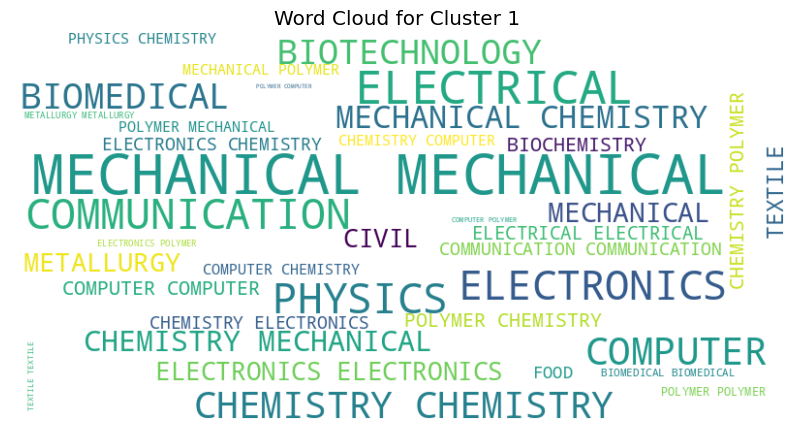

In [96]:
# Assuming you have cluster labels in 'Cluster_Labels' column of your DataFrame
grouped_data = df.groupby('Cluster_Labels')

# Function to generate and display word cloud for a given cluster
def generate_word_cloud(cluster_data, cluster_label):
    text_data = ' '.join(cluster_data['FIELD_OF_INVENTION'])  # Assuming 'new_title' contains text data
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_data)

    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud for Cluster {cluster_label}')
    plt.show()

# Generate word clouds for each cluster
for cluster_label, cluster_data in grouped_data:
    generate_word_cloud(cluster_data, cluster_label)

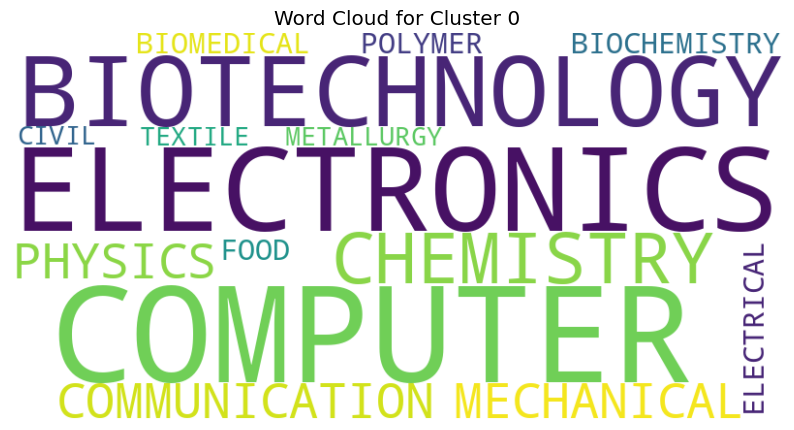

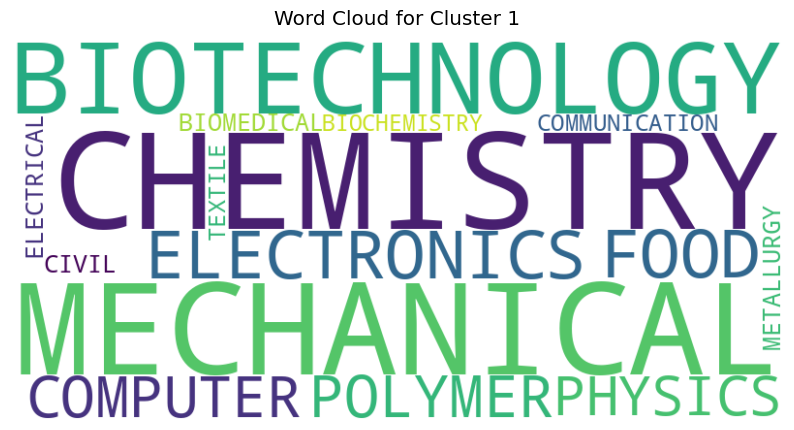

In [98]:
from wordcloud import WordCloud

# Function to generate and display word cloud for a given cluster
def generate_word_cloud(cluster_data, cluster_label):
    # Remove duplicates from 'new_title' column within the cluster
    unique_text_data = cluster_data['FIELD_OF_INVENTION'].unique()
    text_data = ' '.join(unique_text_data)  # Concatenate unique titles

    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_data)

    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud for Cluster {cluster_label}')
    plt.show()

# Generate word clouds for each cluster
for cluster_label, cluster_data in grouped_data:
    generate_word_cloud(cluster_data, cluster_label)


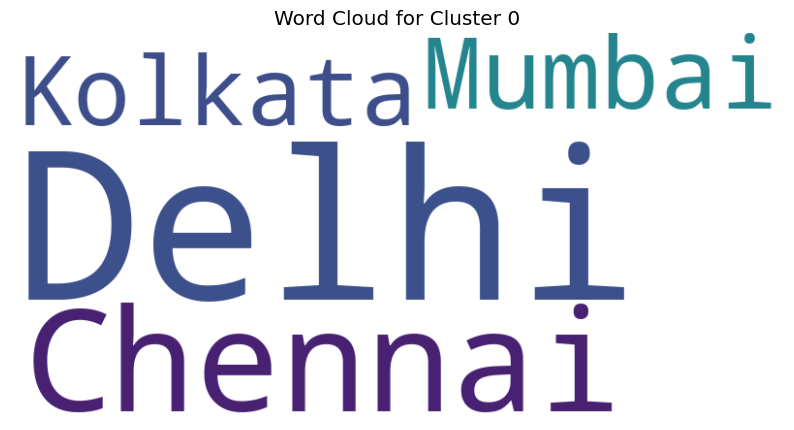

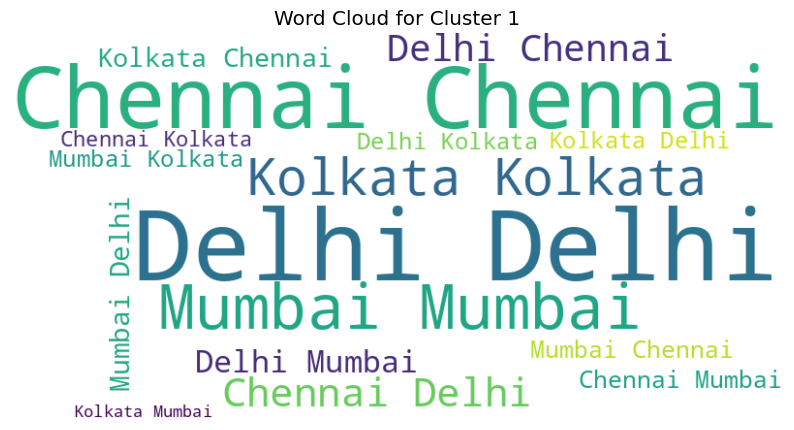

In [97]:
# Assuming you have cluster labels in 'Cluster_Labels' column of your DataFrame
grouped_data = df.groupby('Cluster_Labels')

# Function to generate and display word cloud for a given cluster
def generate_word_cloud(cluster_data, cluster_label):
    text_data = ' '.join(cluster_data['IPO_LOCATION'])  # Assuming 'new_title' contains text data
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_data)

    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud for Cluster {cluster_label}')
    plt.show()

# Generate word clouds for each cluster
for cluster_label, cluster_data in grouped_data:
    generate_word_cloud(cluster_data, cluster_label)

In [91]:
import pandas as pd

# Group data by cluster labels and 'FIELD_OF_INVENTION'
cluster_field_counts = df.groupby(['Cluster_Labels', 'FIELD_OF_INVENTION']).size().reset_index(name='Count')

# Determine unique cluster labels
unique_clusters = cluster_field_counts['Cluster_Labels'].unique()

# Create a dictionary to store cluster-wise data
cluster_data_dict = {}

# Populate the dictionary with data for each cluster
for cluster_number in unique_clusters:
    cluster_data = cluster_field_counts[cluster_field_counts['Cluster_Labels'] == cluster_number]
    cluster_data_dict[f'Cluster {cluster_number}'] = cluster_data.set_index('FIELD_OF_INVENTION')['Count'].to_dict()

# Create a DataFrame from the dictionary
cluster_data_df = pd.DataFrame(cluster_data_dict).fillna(0)  # Fill NaN values with 0

# Display the DataFrame as a table
cluster_data_df

,Cluster 0,Cluster 1
BIOCHEMISTRY,35,399
BIOMEDICAL,53,1427
BIOTECHNOLOGY,140,1137
CHEMISTRY,253,4632
CIVIL,1,668
COMMUNICATION,24,2395
COMPUTER,44,2745
ELECTRICAL,11,2955
ELECTRONICS,58,3711
FOOD,3,267


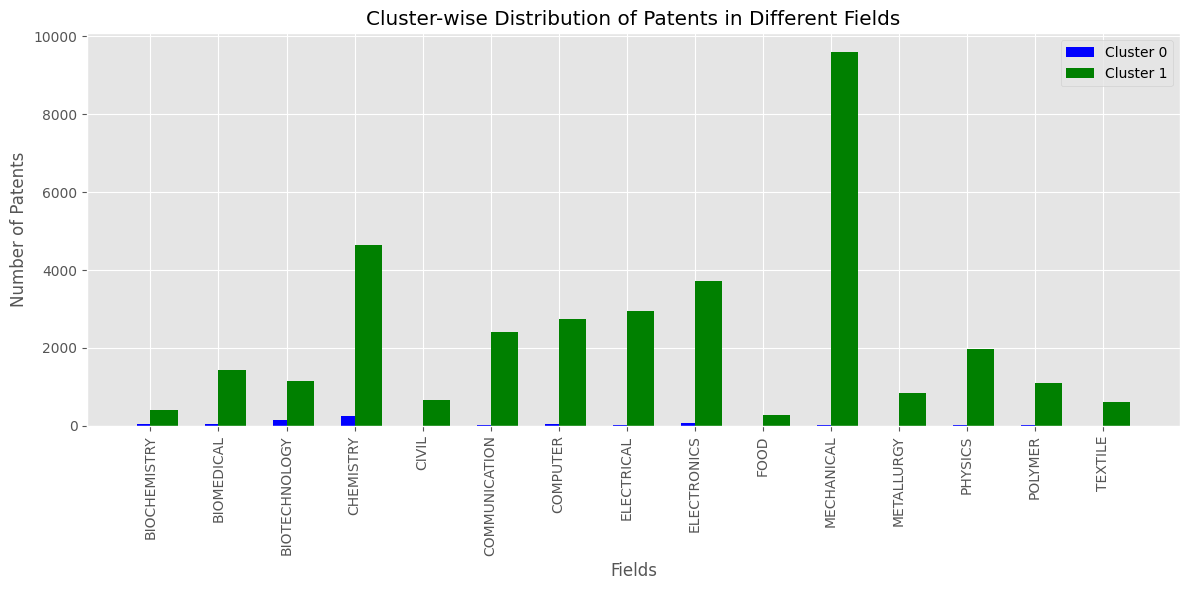

In [69]:
import matplotlib.pyplot as plt

# Data for clusters (replace the values with your actual data)
fields = ['BIOCHEMISTRY', 'BIOMEDICAL', 'BIOTECHNOLOGY', 'CHEMISTRY', 'CIVIL', 'COMMUNICATION',
          'COMPUTER', 'ELECTRICAL', 'ELECTRONICS', 'FOOD', 'MECHANICAL', 'METALLURGY',
          'PHYSICS', 'POLYMER', 'TEXTILE']

cluster_0_counts = [35, 53, 140, 253, 1, 24, 44, 11, 58, 3, 29, 5, 19, 7, 2]
cluster_1_counts = [399, 1427, 1137, 4632, 668, 2395, 2745, 2955, 3711, 267, 9600, 839, 1974, 1090, 617]

x = range(len(fields))

# Plotting the bar plots
plt.figure(figsize=(12, 6))
plt.bar(x, cluster_0_counts, width=0.4, label='Cluster 0', color='b', align='center')
plt.bar(x, cluster_1_counts, width=0.4, label='Cluster 1', color='g', align='edge')

plt.xlabel('Fields')
plt.ylabel('Number of Patents')
plt.title('Cluster-wise Distribution of Patents in Different Fields')
plt.xticks(x, fields, rotation='vertical')
plt.legend()
plt.tight_layout()
plt.show()


In [70]:
import pandas as pd

# Data for clusters (replace the values with your actual data)
fields = ['BIOCHEMISTRY', 'BIOMEDICAL', 'BIOTECHNOLOGY', 'CHEMISTRY', 'CIVIL', 'COMMUNICATION',
          'COMPUTER', 'ELECTRICAL', 'ELECTRONICS', 'FOOD', 'MECHANICAL', 'METALLURGY',
          'PHYSICS', 'POLYMER', 'TEXTILE']

cluster_0_counts = [35, 53, 140, 253, 1, 24, 44, 11, 58, 3, 29, 5, 19, 7, 2]
cluster_1_counts = [399, 1427, 1137, 4632, 668, 2395, 2745, 2955, 3711, 267, 9600, 839, 1974, 1090, 617]

# Calculate total patents for each cluster
total_patents_cluster_0 = sum(cluster_0_counts)
total_patents_cluster_1 = sum(cluster_1_counts)

# Calculate percentages for each field in each cluster
cluster_0_percentages = [count / total_patents_cluster_0 * 100 for count in cluster_0_counts]
cluster_1_percentages = [count / total_patents_cluster_1 * 100 for count in cluster_1_counts]

# Create a DataFrame to display the percentages
data = {
    'Fields': fields,
    'Cluster 0 (%)': cluster_0_percentages,
    'Cluster 1 (%)': cluster_1_percentages
}

percentage_table = pd.DataFrame(data)
percentage_table = percentage_table.round(2)  # Round percentages to 2 decimal places

# Print the percentage-wise table
print(percentage_table)


           Fields  Cluster 0 (%)  Cluster 1 (%)
0    BIOCHEMISTRY           5.12           1.16
1      BIOMEDICAL           7.75           4.14
2   BIOTECHNOLOGY          20.47           3.30
3       CHEMISTRY          36.99          13.44
4           CIVIL           0.15           1.94
5   COMMUNICATION           3.51           6.95
6        COMPUTER           6.43           7.97
7      ELECTRICAL           1.61           8.58
8     ELECTRONICS           8.48          10.77
9            FOOD           0.44           0.77
10     MECHANICAL           4.24          27.86
11     METALLURGY           0.73           2.43
12        PHYSICS           2.78           5.73
13        POLYMER           1.02           3.16
14        TEXTILE           0.29           1.79


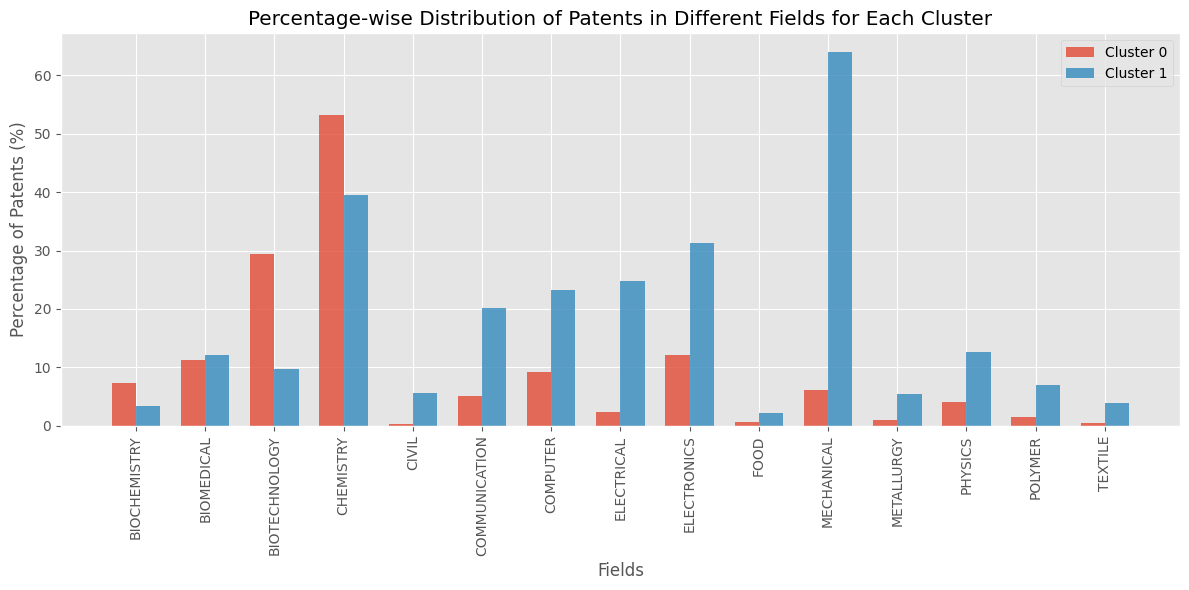

In [71]:
import matplotlib.pyplot as plt
import pandas as pd

# Data (replace these lists with your actual data)
fields = ['BIOCHEMISTRY', 'BIOMEDICAL', 'BIOTECHNOLOGY', 'CHEMISTRY', 'CIVIL', 'COMMUNICATION',
          'COMPUTER', 'ELECTRICAL', 'ELECTRONICS', 'FOOD', 'MECHANICAL', 'METALLURGY',
          'PHYSICS', 'POLYMER', 'TEXTILE']

cluster_0_percentages = [7.39, 11.17, 29.49, 53.29, 0.21, 5.02, 9.25, 2.32, 12.15, 0.63, 6.09, 1.05, 3.99, 1.47, 0.42]
cluster_1_percentages = [3.41, 12.14, 9.69, 39.51, 5.64, 20.24, 23.22, 24.84, 31.23, 2.24, 64.0, 5.42, 12.66, 6.97, 3.91]

# Create a DataFrame for visualization
data = {
    'Fields': fields,
    'Cluster 0 (%)': cluster_0_percentages,
    'Cluster 1 (%)': cluster_1_percentages
}

percentage_table = pd.DataFrame(data)

# Plotting
plt.figure(figsize=(12, 6))

bar_width = 0.35
index = range(len(fields))

plt.bar(index, percentage_table['Cluster 0 (%)'], bar_width, label='Cluster 0', alpha=0.8)
plt.bar([p + bar_width for p in index], percentage_table['Cluster 1 (%)'], bar_width, label='Cluster 1', alpha=0.8)

plt.xlabel('Fields')
plt.ylabel('Percentage of Patents (%)')
plt.title('Percentage-wise Distribution of Patents in Different Fields for Each Cluster')
plt.xticks([p + bar_width / 2 for p in index], fields, rotation='vertical')
plt.legend()
plt.tight_layout()
plt.show()


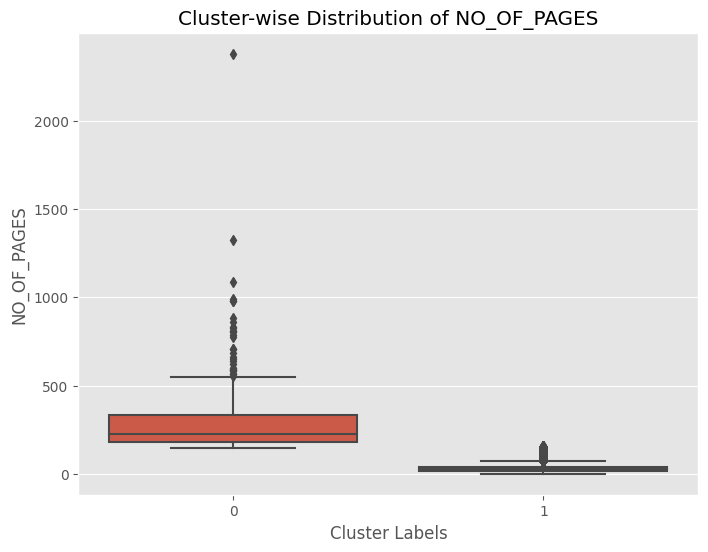

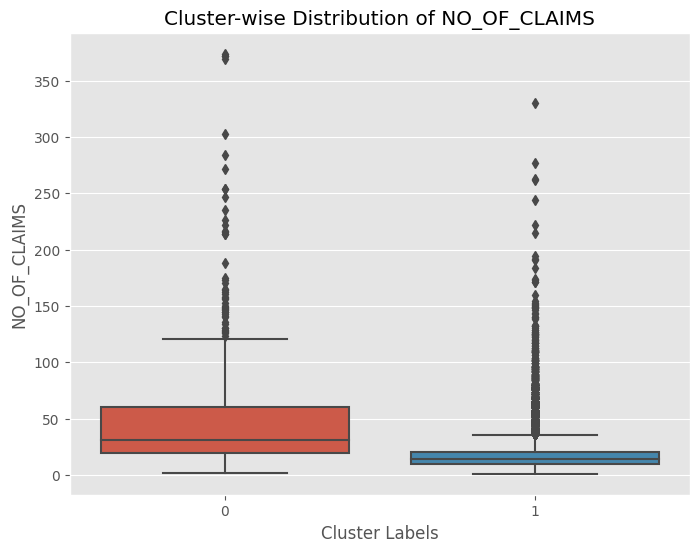

In [72]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame with cluster labels and numerical features
# df = ...

# Box plot for 'NO_OF_PAGES' by cluster
plt.figure(figsize=(8, 6))
sns.boxplot(x='Cluster_Labels', y='NO_OF_PAGES', data=df)
plt.xlabel('Cluster Labels')
plt.ylabel('NO_OF_PAGES')
plt.title('Cluster-wise Distribution of NO_OF_PAGES')
plt.show()

# Box plot for 'NO_OF_CLAIMS' by cluster
plt.figure(figsize=(8, 6))
sns.boxplot(x='Cluster_Labels', y='NO_OF_CLAIMS', data=df)
plt.xlabel('Cluster Labels')
plt.ylabel('NO_OF_CLAIMS')
plt.title('Cluster-wise Distribution of NO_OF_CLAIMS')
plt.show()



In [76]:
# Assuming df is your DataFrame with cluster labels and numerical features
# df = ...

# Grouping by 'Cluster_Labels' and calculating mean values for 'NO_OF_PAGES' and 'NO_OF_CLAIMS'
cluster_means = df.groupby('Cluster_Labels')[['NO_OF_PAGES', 'NO_OF_CLAIMS']].mean()

# Displaying the mean values in a ta
cluster_means



,NO_OF_PAGES,NO_OF_CLAIMS
Cluster_Labels,,
0,280.789474,48.290936
1,33.124826,16.609502


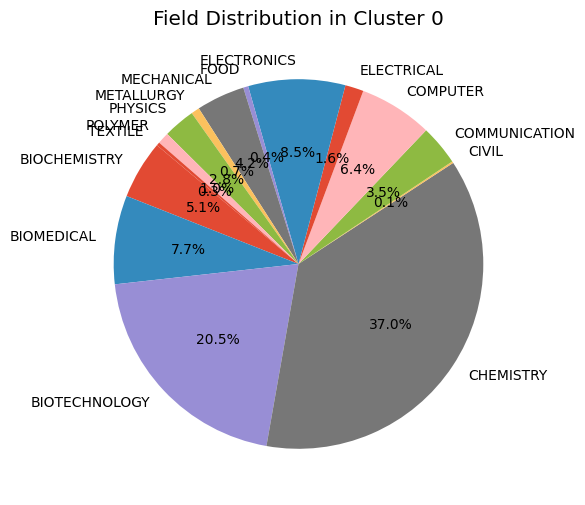

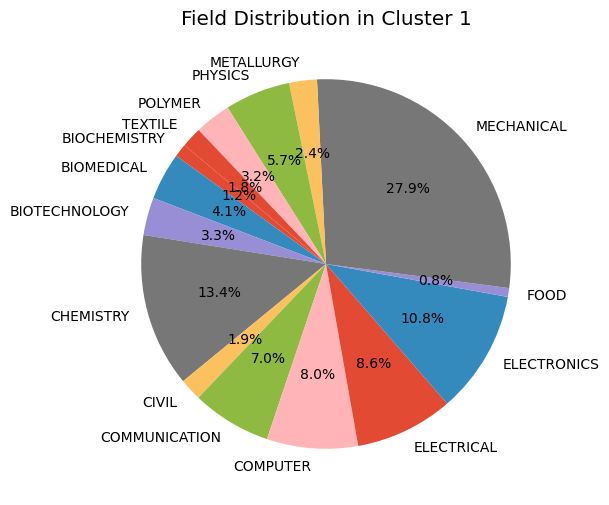

In [77]:
import matplotlib.pyplot as plt

# Data for Cluster 0
fields_cluster_0 = ['BIOCHEMISTRY', 'BIOMEDICAL', 'BIOTECHNOLOGY', 'CHEMISTRY', 'CIVIL', 'COMMUNICATION',
                    'COMPUTER', 'ELECTRICAL', 'ELECTRONICS', 'FOOD', 'MECHANICAL', 'METALLURGY',
                    'PHYSICS', 'POLYMER', 'TEXTILE']
percentages_cluster_0 = [5.12, 7.75, 20.47, 36.99, 0.15, 3.51, 6.43, 1.61, 8.48, 0.44, 4.24, 0.73, 2.78, 1.02, 0.29]

# Data for Cluster 1
fields_cluster_1 = ['BIOCHEMISTRY', 'BIOMEDICAL', 'BIOTECHNOLOGY', 'CHEMISTRY', 'CIVIL', 'COMMUNICATION',
                    'COMPUTER', 'ELECTRICAL', 'ELECTRONICS', 'FOOD', 'MECHANICAL', 'METALLURGY',
                    'PHYSICS', 'POLYMER', 'TEXTILE']
percentages_cluster_1 = [1.16, 4.14, 3.30, 13.44, 1.94, 6.95, 7.97, 8.58, 10.77, 0.77, 27.86, 2.43, 5.73, 3.16, 1.79]

# Create pie chart for Cluster 0
plt.figure(figsize=(10, 6))
plt.pie(percentages_cluster_0, labels=fields_cluster_0, autopct='%1.1f%%', startangle=140)
plt.title('Field Distribution in Cluster 0')
plt.show()

# Create pie chart for Cluster 1
plt.figure(figsize=(10, 6))
plt.pie(percentages_cluster_1, labels=fields_cluster_1, autopct='%1.1f%%', startangle=140)
plt.title('Field Distribution in Cluster 1')
plt.show()


In [84]:
import pandas as pd

# Group data by cluster labels and 'FIELD_OF_INVENTION'
cluster_field_counts = df.groupby(['Cluster_Labels', 'FIELD_OF_INVENTION']).size().reset_index(name='Count')

# Determine unique cluster labels
unique_clusters = cluster_field_counts['Cluster_Labels'].unique()

# Create a dictionary to store cluster-wise data
cluster_data_dict = {}

# Populate the dictionary with data for each cluster
for cluster_number in unique_clusters:
    cluster_data = cluster_field_counts[cluster_field_counts['Cluster_Labels'] == cluster_number]
    cluster_data_dict[f'Cluster {cluster_number}'] = cluster_data.set_index('FIELD_OF_INVENTION')['Count'].to_dict()

# Create a DataFrame from the dictionary
cluster_data_df = pd.DataFrame(cluster_data_dict).fillna(0)  # Fill NaN values with 0

# Display the DataFrame as a table
cluster_data_df

,Cluster 0,Cluster 1
BIOCHEMISTRY,35,399
BIOMEDICAL,53,1427
BIOTECHNOLOGY,140,1137
CHEMISTRY,253,4632
CIVIL,1,668
COMMUNICATION,24,2395
COMPUTER,44,2745
ELECTRICAL,11,2955
ELECTRONICS,58,3711
FOOD,3,267
